In [25]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
# import dataset
df = pd.read_csv("C:\Maryam\ODU\Fall2021\DataVisualisation\HWs\HW4/VDH-COVID-19-PublicUseDataset-Vaccines-DosesAdministered.csv")
df.shape

(422246, 8)

In [27]:
df.head()

,Administration Date,FIPS,Locality,Health District,Facility Type,Vaccine Manufacturer,Dose Number,Vaccine Doses Administered Count
0,08/05/2021,51685,Manassas Park,Prince William,Pharmacies,Moderna,2,3
1,06/23/2021,51093,Isle of Wight,Western Tidewater,Pharmacies,Pfizer,2,16
2,08/29/2021,51087,Henrico,Henrico,Medical Practices,Pfizer,2,7
3,09/17/2021,51620,Franklin City,Western Tidewater,Pharmacies,Moderna,3,1
4,08/31/2021,51199,York,Peninsula,Local Health Departments,Pfizer,1,1


In [28]:
df.isnull().sum()

Administration Date                 2
FIPS                                0
Locality                            0
Health District                     0
Facility Type                       0
Vaccine Manufacturer                0
Dose Number                         0
Vaccine Doses Administered Count    0
dtype: int64

In [29]:
data = df.dropna()
data.shape

(422244, 8)

In [30]:
data['Health District'].unique()

array(['Prince William', 'Western Tidewater', 'Henrico', 'Peninsula',
       'Pittsylvania-Danville', 'Alexandria', 'Mount Rogers',
       'Lord Fairfax', 'Central Shenandoah', 'Rappahannock', 'Lenowisco',
       'Chesterfield', 'Loudoun', 'Crater', 'Cumberland Plateau',
       'Three Rivers', 'Virginia Beach', 'New River', 'Arlington',
       'Roanoke', 'Blue Ridge', 'Southside', 'Piedmont', 'Fairfax',
       'Chickahominy', 'Rappahannock Rapidan', 'Portsmouth',
       'Out of State', 'Alleghany', 'Norfolk', 'West Piedmont',
       'Chesapeake', 'Central Virginia', 'Not Reported', 'Eastern Shore',
       'Richmond', 'Hampton'], dtype=object)

In [31]:
data['Health District'].unique().size

37

In [32]:
data_clean = data[(data['Health District']!='Out of State') & (data['Health District']!='Not Reported')]

In [33]:
data_clean['Health District'].unique().size

35

In [34]:
data_pfizer_1 = data_clean[(data_clean['Vaccine Manufacturer']== 'Pfizer') & (data_clean['Dose Number']==1)]

In [35]:
data_pfizer_1.head()

,Administration Date,FIPS,Locality,Health District,Facility Type,Vaccine Manufacturer,Dose Number,Vaccine Doses Administered Count
4,08/31/2021,51199,York,Peninsula,Local Health Departments,Pfizer,1,1
11,08/06/2021,51187,Warren,Lord Fairfax,Medical Practices,Pfizer,1,3
15,06/11/2021,51570,Colonial Heights,Chesterfield,Hospitals,Pfizer,1,1
16,03/29/2021,51678,Lexington,Central Shenandoah,Pharmacies,Pfizer,1,6
17,04/24/2021,51107,Loudoun,Loudoun,Medical Practices,Pfizer,1,87


In [36]:
counts = data_pfizer_1.groupby(['Health District']).count()

In [37]:
data_1 = data_clean[(data_clean['Dose Number']==1)]
Total = data_1.groupby(['Health District']).count()

In [38]:
proportion = (counts['FIPS'].values/Total['FIPS'])*100
proportion

Health District
Alexandria               45.834810
Alleghany                44.672336
Arlington                43.268277
Blue Ridge               47.586919
Central Shenandoah       45.765555
Central Virginia         45.205015
Chesapeake               43.825408
Chesterfield             42.906738
Chickahominy             44.614724
Crater                   43.397313
Cumberland Plateau       39.638504
Eastern Shore            38.666206
Fairfax                  48.289709
Hampton                  44.767677
Henrico                  41.137230
Lenowisco                41.044937
Lord Fairfax             46.937562
Loudoun                  45.057549
Mount Rogers             42.485047
New River                43.508727
Norfolk                  43.887262
Peninsula                46.993200
Piedmont                 41.358904
Pittsylvania-Danville    40.448078
Portsmouth               44.415011
Prince William           48.383321
Rappahannock             44.225160
Rappahannock Rapidan     48.736290
Rich

<BarContainer object of 35 artists>

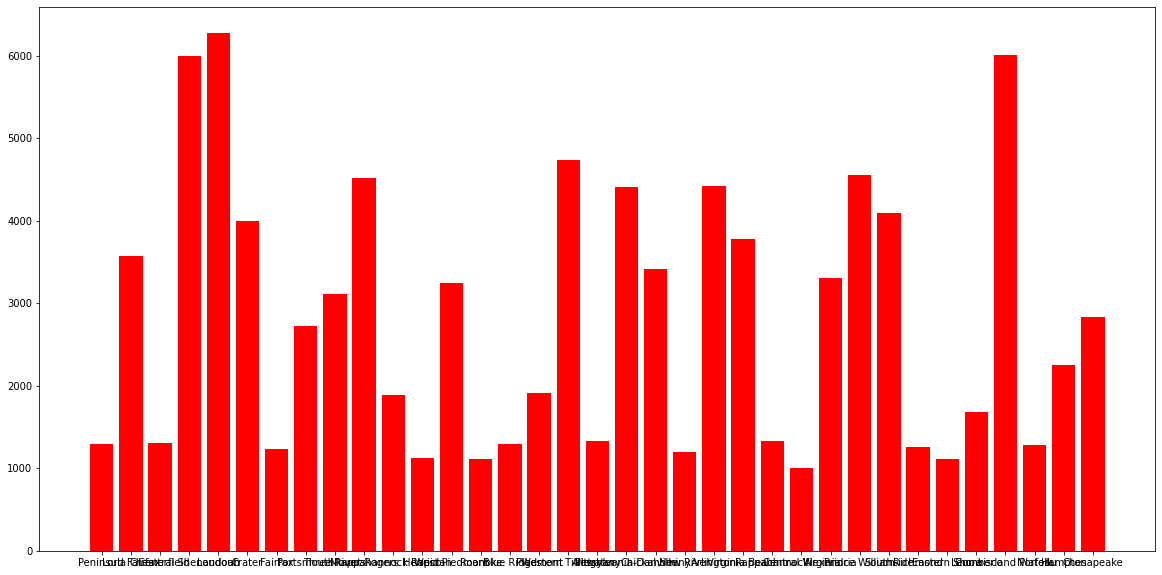

In [57]:
plt.figure(figsize=(20, 10))
plt.bar(data_pfizer_1['Health District'].unique(), counts['FIPS'].values, color = 'red')


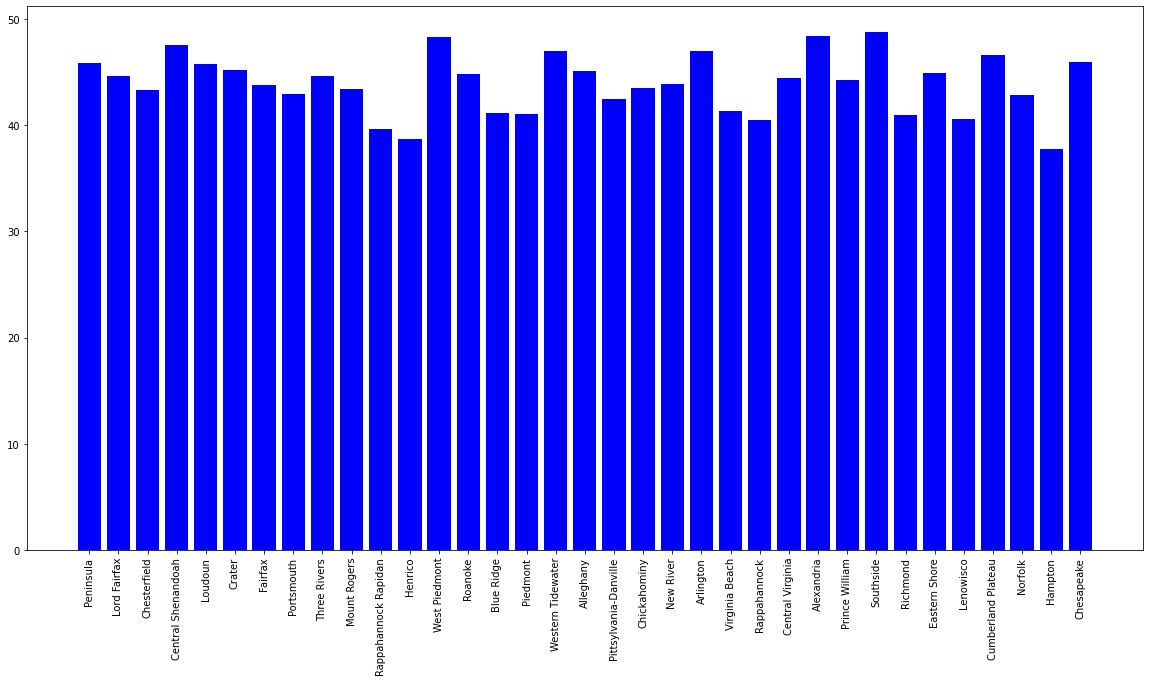

In [56]:
plt.figure(figsize=(20, 10))
plt.bar(data_pfizer_1['Health District'].unique(), proportion , color = 'blue')
plt.xticks(rotation = 90)
plt.show()

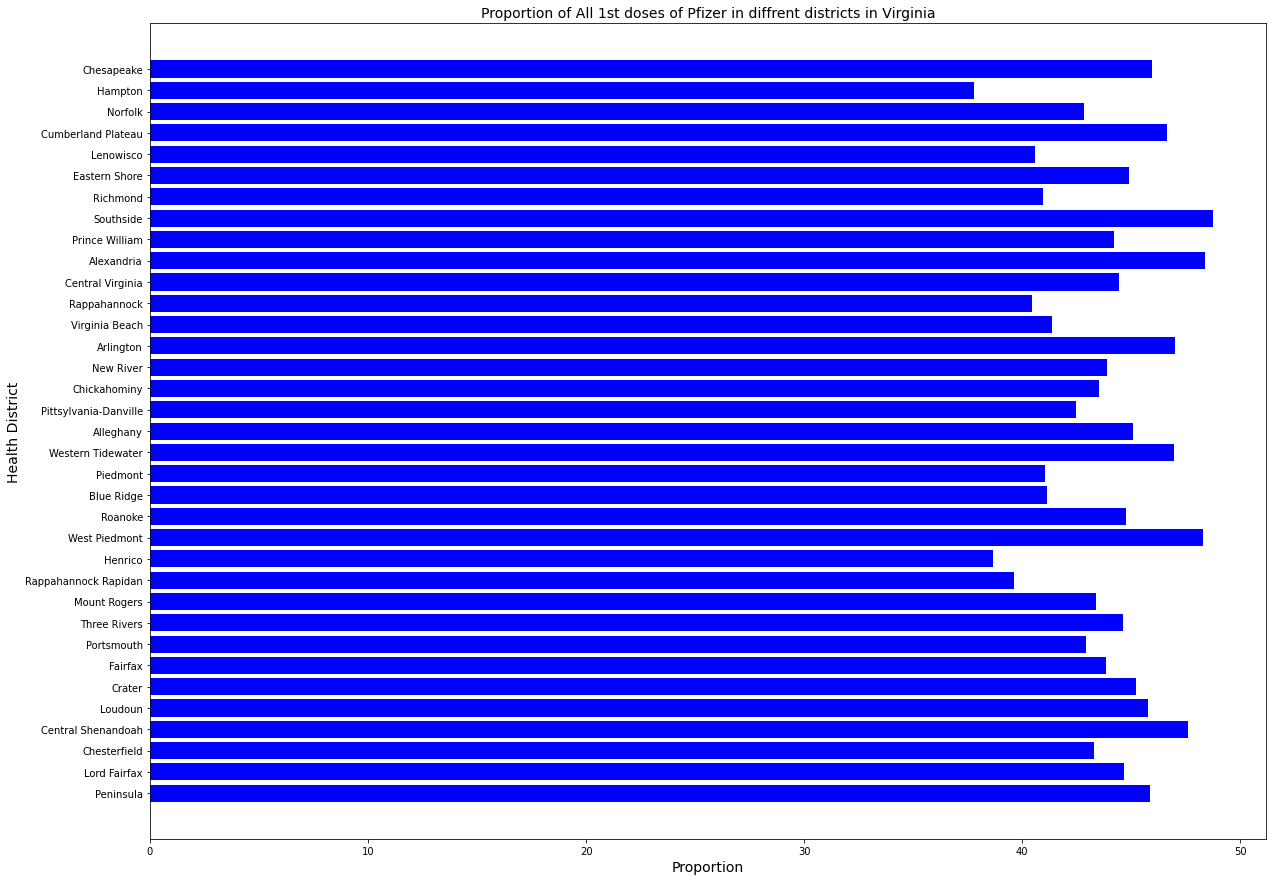

In [54]:
plt.figure(figsize=(20, 15))
plt.barh(data_pfizer_1['Health District'].unique(), proportion , color = 'blue')
plt.title('Proportion of All 1st doses of Pfizer in diffrent districts in Virginia',fontsize=14, color='black')
plt.xlabel('Proportion', fontsize=14, color='black')
plt.ylabel('Health District', fontsize=14, color='black')
plt.show()